<a href="https://colab.research.google.com/github/abhinag007/Stock-Money-MLM/blob/master/cnn_stock_predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install iexfinance

     |████████████████████████████████| 51kB 2.8MB/s 


In [ ]:
pip install pandas datetime matplotlib

     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 235kB 10.4MB/s 


In [ ]:
import pandas as pd
from iexfinance.stocks import Stock
from datetime import datetime
import matplotlib.pyplot as plt
from iexfinance.stocks import get_historical_data

In [ ]:
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
df.to_csv('S&P500-Info.csv')
df.to_csv("S&P500-Symbols.csv", columns=['Symbol'])

In [ ]:
sp = pd.read_csv('S&P500-Symbols.csv', index_col=[0])


In [ ]:
# getCompanyInfo returns a dictionary with the company symbol as a key and the info as the value 
# call to iex finance api to return company info for a list of symbols
def getCompanyInfo(symbols):
    stock_batch = Stock(symbols,
                        token='pk_5fffbf57fa5e4a24a2728f6d066145f2')
    company_info = stock_batch.get_company()
    return company_info

In [ ]:
sp_company_info = getCompanyInfo(sp["Symbol"][:5].tolist())


In [ ]:
company_info_to_df = []
for company in sp_company_info:
    company_info_to_df.append(sp_company_info[company])

In [ ]:
columns = ['symbol', 'companyName', 'exchange',
           'industry', 'website', 'CEO', 'sector']
df = pd.DataFrame(company_info_to_df, columns=columns )
df

,symbol,companyName,exchange,industry,website,CEO,sector
0,MMM,3M Co.,New York Stock Exchange,Industrial Conglomerates,http://www.3m.com,Michael F. Roman,Producer Manufacturing
1,ABT,Abbott Laboratories,New York Stock Exchange,Medical Specialties,http://www.abbott.com,Robert B. Ford,Health Technology
2,ABBV,"AbbVie, Inc.",New York Stock Exchange,Pharmaceuticals: Major,http://www.abbvie.com,Richard A. Gonzalez,Health Technology
3,ABMD,"ABIOMED, Inc.",NASDAQ,Medical Specialties,http://www.abiomed.com,Michael R. Minogue,Health Technology
4,ACN,Accenture Plc,New York Stock Exchange,Information Technology Services,http://www.accenture.com,Julie Spellman Sweet,Technology Services


In [ ]:
def getEarnings(symbol):
    stock_batch = Stock(symbol,
                        token='pk_5fffbf57fa5e4a24a2728f6d066145f2')
    earnings = stock_batch.get_earnings(last=4)
    return earnings

single_stock_earnings = getEarnings(sp["Symbol"][0])

In [ ]:
df_earnings = pd.DataFrame(single_stock_earnings)


In [ ]:
def getHistoricalPrices(stock):
    return get_historical_data(stock, start, end, 
                               output_format='pandas', 
                               token='pk_5fffbf57fa5e4a24a2728f6d066145f2')
 
start = datetime(2016, 1, 1)
end = datetime(2020, 8, 7)
single_stock_history = getHistoricalPrices(sp["Symbol"][1])

IEXQueryError: ignored

In [ ]:
single_stock_history

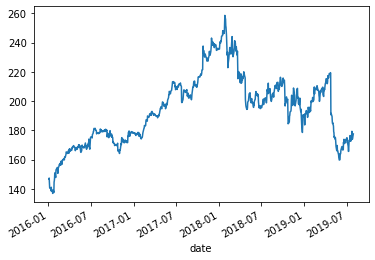

In [ ]:
single_stock_history['close'].plot(label="3M Close")


In [ ]:
# Full code


# import pandas as pd
# from iexfinance.stocks import Stock
# from datetime import datetime
# import matplotlib.pyplot as plt
# from iexfinance.stocks import get_historical_data
# def getCompanyInfo(symbols):
#     stock_batch = Stock(symbols,
#                         token=<API_TOKEN>)
#     company_info = stock_batch.get_company()
#     return company_info
# def getEarnings(symbol):
#     stock_batch = Stock(symbol,
#                         token=<API_TOKEN>)
#     earnings = stock_batch.get_earnings(last=4)
#     return earnings
# def getHistoricalPrices(stock):
#     return get_historical_data(stock, start, end, 
#                                output_format='pandas', 
#                                token=<API_TOKEN>)
# sp = pd.read_csv('S&P500-Symbols.csv', index_col=[0])
# sp_company_info = getCompanyInfo(sp["Symbol"][:5].tolist())
# company_info_to_df = []
# for company in sp_company_info:
#     company_info_to_df.append(sp_company_info[company])
# columns = ['symbol', 'companyName', 'exchange',
#            'industry', 'website', 'CEO', 'sector']
# df = pd.DataFrame(company_info_to_df, columns=columns )
# df.head()
# single_stock_earnings = getEarnings(sp["Symbol"][0])
# df_earnings = pd.DataFrame(single_stock_earnings)
# df_earnings.head()
# start = datetime(2016, 1, 1)
# end = datetime(2019, 7, 30)
# single_stock_history = getHistoricalPrices(sp["Symbol"][0])
# single_stock_history['close'].plot(label="3M Close")